# **LSTM Exercise**

## Import libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [61]:
data =pd.read_csv('/content/traffic (1).csv')

In [62]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [64]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [65]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [66]:
data.set_index('DateTime', inplace=True)

In [67]:
data.drop(columns=['ID'], inplace=True)

In [68]:
data.drop(columns=['Junction'],inplace =True)

In [69]:
data.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


In [70]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [71]:
dataset

array([[0.07821229],
       [0.06703911],
       [0.05027933],
       ...,
       [0.08379888],
       [0.11731844],
       [0.06145251]])

## Normalize the dataset

## split into train and test sets

In [72]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

32240 15880


In [73]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [74]:
time_step = 10
trainX, trainY = create_dataset(train, time_step)
testX, testY = create_dataset(test, time_step)

In [75]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)

In [76]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Fit the LSTM

In [78]:
model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY))

Epoch 1/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 2/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 7.6262e-04 - val_loss: 0.0010
Epoch 3/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 7.1530e-04 - val_loss: 9.8285e-04
Epoch 4/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 6.8107e-04 - val_loss: 9.7323e-04
Epoch 5/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 6.5565e-04 - val_loss: 9.4442e-04
Epoch 6/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 6.4446e-04 - val_loss: 9.5591e-04
Epoch 7/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 6.4059e-04 - val_loss: 9.5383e-04
Epoch 8/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 6.2624e-04 - val_loss: 9.4012e-04
Epoch 9/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 6.4245e-04 - val_loss: 0.0011
Epoch 10/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 6.0443e-04 - val_loss: 9.8937e-04
Epoch 11/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - l

## Make preductuion and evaluatuin matrix.

In [79]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
496/496 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [80]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [81]:
print("Train predictions shape:", train_predict.shape)
print("Test predictions shape:", test_predict.shape)

Train predictions shape: (32229, 1)
Test predictions shape: (15869, 1)


## Visualize the result

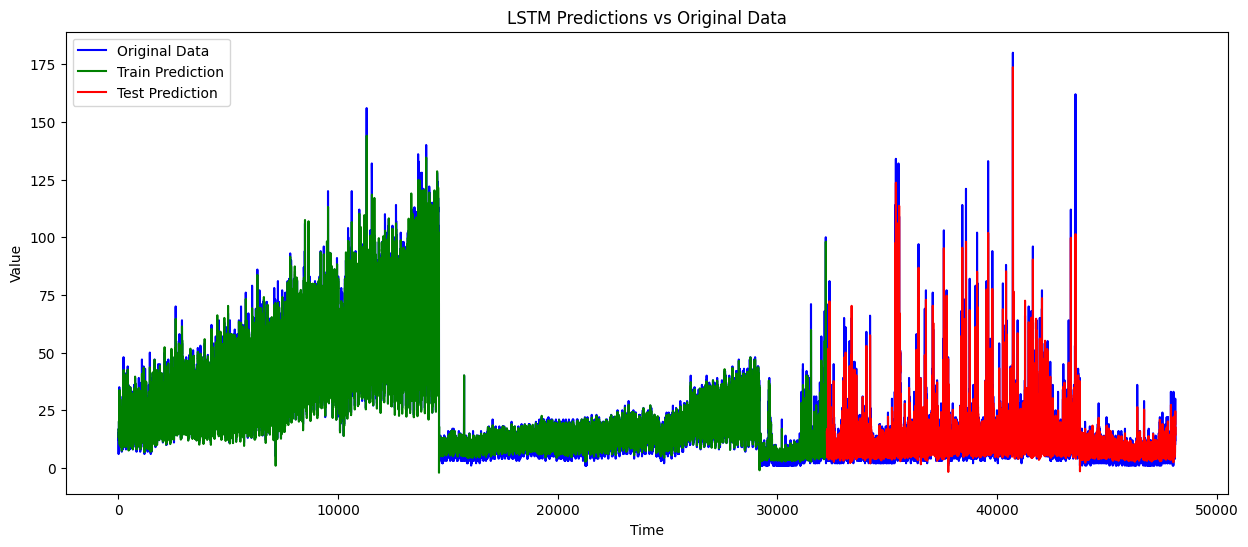

In [86]:
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(dataset) - 1, :] = test_predict
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(dataset), label='Original Data', color='blue')
plt.plot(train_predict_plot, label='Train Prediction', color='green')
plt.plot(test_predict_plot, label='Test Prediction', color='red')
plt.title('LSTM Predictions vs Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# **Well done** :)